   Time (seconds)  time_ms  distance_cm   action
0            0.98        0    473.04120  forward
1            1.21      264     53.23024  forward
2            1.47      524     61.21993  forward
3            1.71      760     56.28866  forward
4            1.95     1000    101.44330  forward
Number of times in safe zone: 208
First entry into safe zone at time (ms): 19132.617339074528


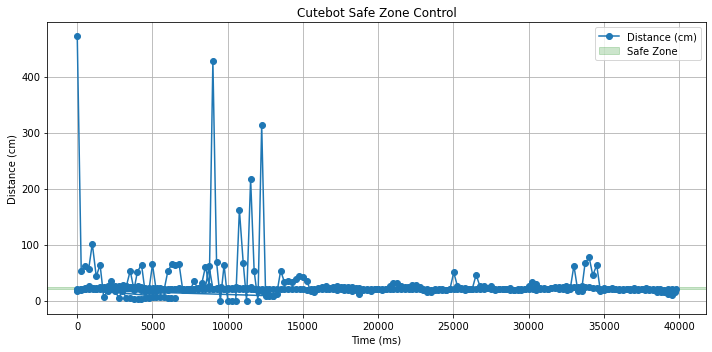

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# --- Load CSV ---
df = pd.read_csv("lab5_a.csv")  # replace with your exported CSV
print(df.head())

# --- Count safe zone occurrences ---
safe_count = df[df['action'] == "safe_zone"].shape[0]
print("Number of times in safe zone:", safe_count)

# --- Find first entry into safe zone ---
# Interpolate distance vs time to create a function
distance_interp = lambda t: np.interp(t, df['time_ms'], df['distance_cm'])

# Find when distance first reaches SAFE_MIN
result = root_scalar(lambda t: distance_interp(t) - 20, bracket=[0, df['time_ms'].iloc[-1]])
if result.converged:
    print("First entry into safe zone at time (ms):", result.root)
else:
    print("Root not found")

# --- Plot distance vs time with shaded safe zone ---
plt.figure(figsize=(10,5))
plt.plot(df['time_ms'], df['distance_cm'], label='Distance (cm)', marker='o', linestyle='-')
plt.axhspan(20, 25, color='green', alpha=0.2, label='Safe Zone')
plt.xlabel("Time (ms)")
plt.ylabel("Distance (cm)")
plt.title("Cutebot Safe Zone Control")
plt.legend()
plt.grid(True)
plt.tight_layout()

# --- Save plot ---
plt.savefig("target_plot.png", dpi=300)
plt.show()